# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Kadek Indri Anisa Putri
- **Email:** indrianisaputri14@gmail.com
- **ID Dicoding:** indrianisaputri

## Menentukan Pertanyaan Bisnis

Berdasarkan karakteristik dataset Bike Sharing 2011–2012, berikut pertanyaan bisnis yang dirumuskan menggunakan prinsip SMART:

- Bagaimana perbedaan rata-rata dan distribusi jumlah penyewaan sepeda berdasarkan musim selama periode 2011–2012, dan musim mana yang sebaiknya diprioritaskan untuk penambahan armada?
- Seberapa besar penurunan rata-rata penyewaan sepeda pada kondisi cuaca buruk dibanding cuaca cerah selama periode 2011–2012, serta bagaimana implikasinya terhadap strategi operasional?
- Bagaimana perbedaan pola penyewaan antara hari kerja dan akhir pekan selama dua tahun pengamatan, dan bagaimana perusahaan dapat mengoptimalkan distribusi sepeda berdasarkan tipe hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset harian (`day_df`) memuat informasi lengkap mengenai faktor waktu, kondisi cuaca, dan komposisi penyewaan sepeda dalam satu hari.
- Variabel target utama adalah `cnt`, yang merupakan total penyewaan dan merupakan agregasi dari `casual` dan `registered`. Hal ini menunjukkan bahwa perilaku dua tipe pengguna dapat dianalisis secara terpisah jika diperlukan.
- Dataset mencakup variabel eksternal seperti suhu (`temp`), kelembapan (`hum`), dan kecepatan angin (`windspeed`), yang memungkinkan analisis hubungan antara kondisi cuaca dan jumlah penyewaan.
- Adanya variabel `workingday` memungkinkan analisis perbandingan antara hari kerja dan akhir pekan.
- Dataset harian dipilih sebagai fokus analisis karena lebih representatif untuk melihat pola makro dan tren strategis dibanding data per jam yang lebih granular.

### Assessing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


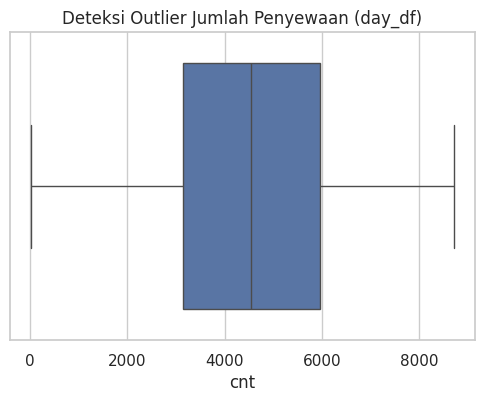

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


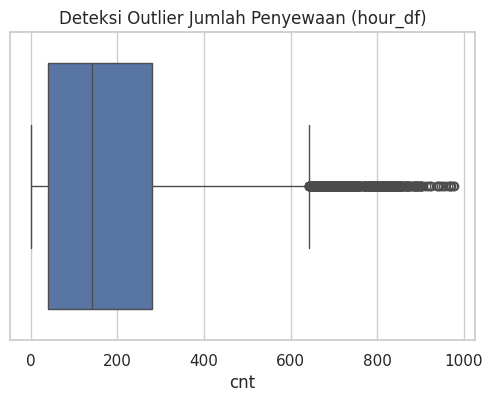

In [3]:
# =========================
# Assessing day_df
# =========================

day_df.info()
day_df.isna().sum()
day_df.duplicated().sum()

day_df[["temp", "hum", "windspeed", "casual", "registered", "cnt"]].describe()

# Validasi konsistensi total penyewaan
(day_df["casual"] + day_df["registered"] - day_df["cnt"]).sum()

# Cek kategori unik
day_df["season"].unique()
day_df["weathersit"].unique()
day_df["workingday"].unique()

# Deteksi outlier
plt.figure(figsize=(6,4))
sns.boxplot(x=day_df["cnt"])
plt.title("Deteksi Outlier Jumlah Penyewaan (day_df)")
plt.show()


# =========================
# Assessing hour_df
# =========================

hour_df.info()
hour_df.isna().sum()
hour_df.duplicated().sum()

hour_df[["temp", "hum", "windspeed", "casual", "registered", "cnt"]].describe()

# Validasi konsistensi total penyewaan
(hour_df["casual"] + hour_df["registered"] - hour_df["cnt"]).sum()

# Cek kategori unik
hour_df["season"].unique()
hour_df["weathersit"].unique()
hour_df["workingday"].unique()

# Deteksi outlier
plt.figure(figsize=(6,4))
sns.boxplot(x=hour_df["cnt"])
plt.title("Deteksi Outlier Jumlah Penyewaan (hour_df)")
plt.show()

**Insight:**
- Dataset terdiri dari dua tingkat agregasi:
    - `day_df` dengan 731 observasi harian dan 16 variabel,
    - `hour_df` dengan 17.379 observasi per jam dan 17 variabel.
Hal ini memungkinkan analisis pada level makro (harian) maupun mikro (intrahari).

- Tidak ditemukan missing value maupun duplikasi pada kedua dataset, sehingga data siap digunakan untuk analisis tanpa perlu penanganan data hilang.
- Variabel `dteday` pada kedua dataset masih bertipe `object` dan perlu dikonversi ke `datetime` untuk mendukung analisis berbasis waktu.
- Pada `day_df`, variabel `cnt` memiliki rentang yang lebar (sekitar 0 hingga ±8700), menunjukkan variasi permintaan yang signifikan antar hari namun tanpa outlier ekstrem yang tidak wajar.
- Pada `hour_df`, distribusi `cnt` menunjukkan adanya banyak nilai ekstrem pada jam-jam tertentu (terlihat titik outlier pada boxplot), yang mencerminkan lonjakan penyewaan pada jam puncak.
- Variabel `season` dan `weathersit` pada kedua dataset masih berupa kode numerik, sehingga perlu dilakukan mapping agar interpretasi analisis lebih informatif.

### Cleaning Data

In [4]:
if day_df["dteday"].dtype != "datetime64[ns]":
    day_df["dteday"] = pd.to_datetime(day_df["dteday"])
season_map = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

if pd.api.types.is_numeric_dtype(day_df["season"]):
    day_df["season"] = day_df["season"].map(season_map)

weather_map = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}

if pd.api.types.is_numeric_dtype(day_df["weathersit"]):
    day_df["weathersit"] = day_df["weathersit"].map(weather_map)

if pd.api.types.is_numeric_dtype(day_df["workingday"]):
    day_df["workingday"] = day_df["workingday"].map({
        0: "Weekend/Holiday",
        1: "Working Day"
    })

if "year" not in day_df.columns:
    day_df["year"] = day_df["dteday"].dt.year

if "month" not in day_df.columns:
    day_df["month"] = day_df["dteday"].dt.month_name()

**Insight:**
- Variabel `dteday` berhasil dikonversi ke tipe datetime untuk memungkinkan analisis berbasis waktu.
- Variabel kategori seperti `season`, `weathersit`, dan `workingday` telah diubah menjadi label yang lebih informatif untuk meningkatkan interpretasi visualisasi.
- Informasi tahun dan bulan diekstraksi dari tanggal untuk mendukung analisis tren temporal.
- Tidak diperlukan penanganan missing value maupun duplikasi karena dataset sudah bersih sejak tahap assessing.

## Exploratory Data Analysis (EDA)

### Explore Pola Penyewaan Berdasarkan Musim

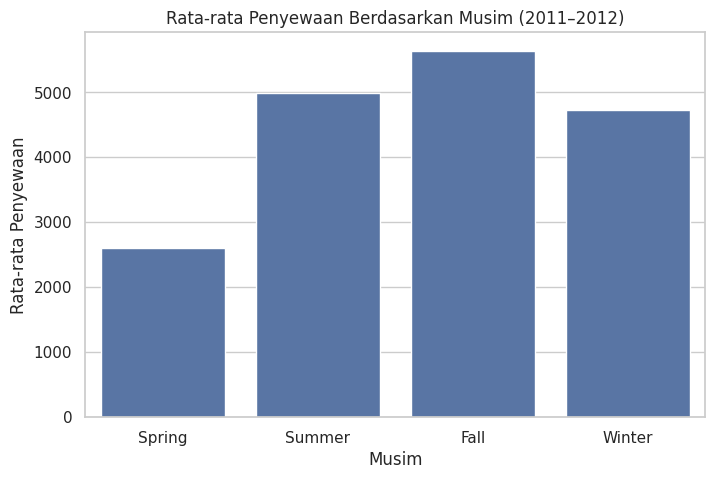

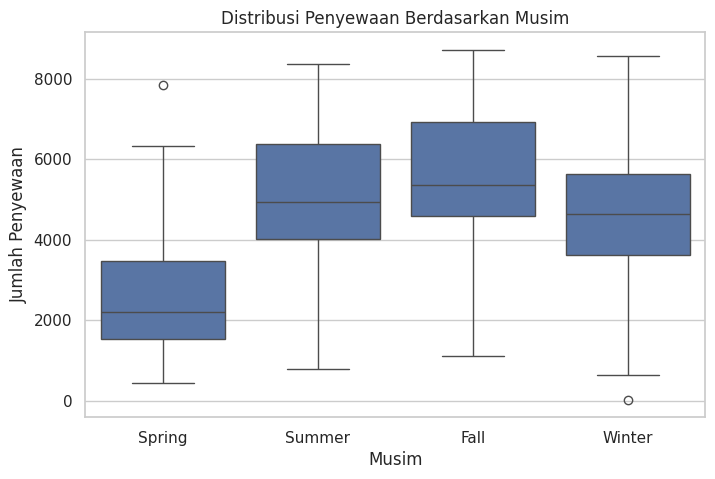

In [5]:
# Pastikan urutan musim konsisten
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Rata-rata Penyewaan per Musim
season_mean = (
    day_df.groupby("season")["cnt"]
    .mean()
    .reindex(season_order)
    .reset_index()
)

season_mean

# Visualisasi Rata-rata
plt.figure(figsize=(8,5))
sns.barplot(data=season_mean, x="season", y="cnt", order=season_order)
plt.title("Rata-rata Penyewaan Berdasarkan Musim (2011–2012)")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

# Distribusi Penyewaan per Musim
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x="season", y="cnt", order=season_order)
plt.title("Distribusi Penyewaan Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Musim Fall menunjukkan rata-rata penyewaan tertinggi dibanding musim lainnya, dengan median distribusi yang juga paling tinggi. Ini menunjukkan bahwa peningkatan permintaan pada Fall bersifat konsisten, bukan hanya dipengaruhi oleh beberapa hari ekstrem.
- Musim Summer berada di posisi kedua dengan rata-rata yang relatif tinggi dan distribusi yang cukup stabil, menunjukkan periode demand kuat yang lebih terkendali dibanding Fall.
- Musim Winter memiliki rata-rata yang sedikit lebih rendah dari Summer, namun distribusinya menunjukkan variasi yang cukup besar, termasuk beberapa hari dengan penyewaan sangat rendah (mendekati nol).
- Musim Spring secara konsisten memiliki rata-rata dan median terendah, dengan distribusi yang cenderung berada pada rentang bawah dibanding musim lainnya.
- Rentang nilai penyewaan antar musim cukup lebar (dari hampir 0 hingga mendekati 9000 unit), menunjukkan bahwa faktor musiman memiliki pengaruh signifikan terhadap fluktuasi permintaan.

### Explore Pola Penyewaan Berdasarkan Cuaca

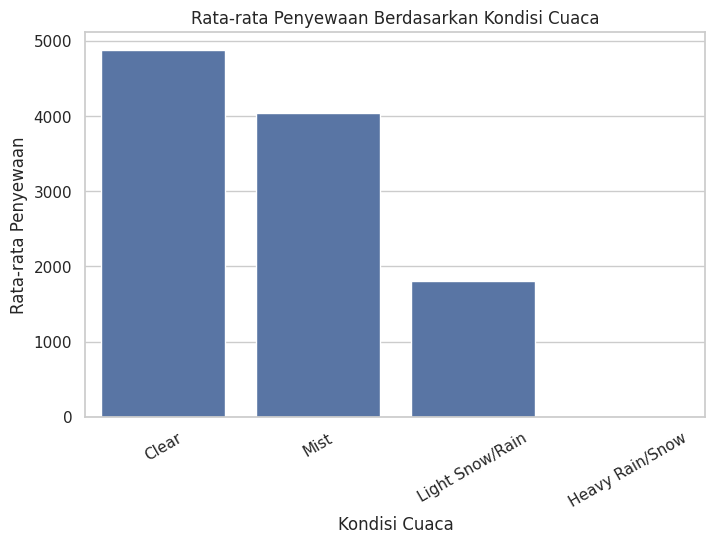

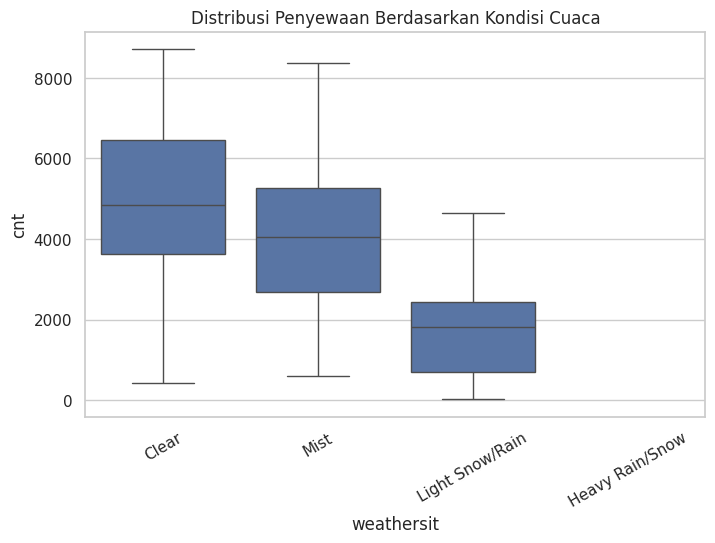

In [6]:
weather_order = ["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"]

weather_mean = (
    day_df.groupby("weathersit")["cnt"]
    .mean()
    .reindex(weather_order)
    .reset_index()
)

weather_mean

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(data=weather_mean, x="weathersit", y="cnt", order=weather_order)
plt.xticks(rotation=30)
plt.title("Rata-rata Penyewaan Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

# Tambahan Distribusi (supaya EDA lebih dalam)
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x="weathersit", y="cnt", order=weather_order)
plt.xticks(rotation=30)
plt.title("Distribusi Penyewaan Berdasarkan Kondisi Cuaca")
plt.show()

**Insight:**
- Kondisi Clear menunjukkan rata-rata penyewaan tertinggi (mendekati 4900 unit per hari) dengan median distribusi yang juga paling tinggi. Hal ini menunjukkan bahwa permintaan sepeda paling optimal terjadi saat cuaca cerah.
- Pada kondisi Mist, rata-rata penyewaan mengalami penurunan dibanding Clear (sekitar 4000 unit), namun distribusinya masih relatif tinggi dan stabil. Artinya, cuaca berkabut tidak menurunkan permintaan secara drastis.
- Pada kondisi Light Snow/Rain, terjadi penurunan yang sangat signifikan (rata-rata sekitar 1700–1800 unit). Median dan rentang distribusinya juga jauh lebih rendah dibanding dua kondisi sebelumnya.
- Kategori Heavy Rain/Snow hampir tidak menunjukkan aktivitas penyewaan (tidak terlihat boxplot aktif), yang mengindikasikan bahwa kondisi cuaca ekstrem sangat membatasi penggunaan sepeda.
- Perbedaan median dan rentang distribusi antar kondisi cuaca menunjukkan bahwa cuaca memiliki pengaruh langsung dan kuat terhadap fluktuasi permintaan penyewaan sepeda.

### Explore Perbandingan Hari Kerja vs Akhir Pekan

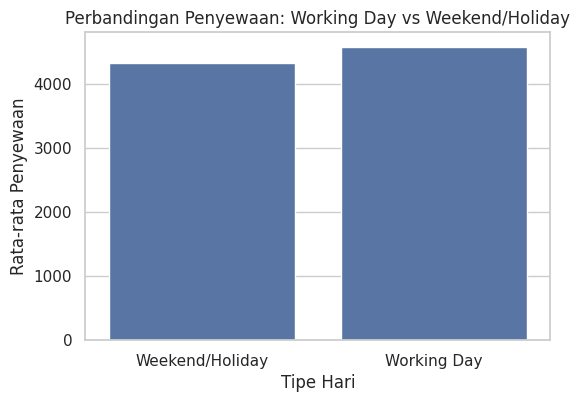

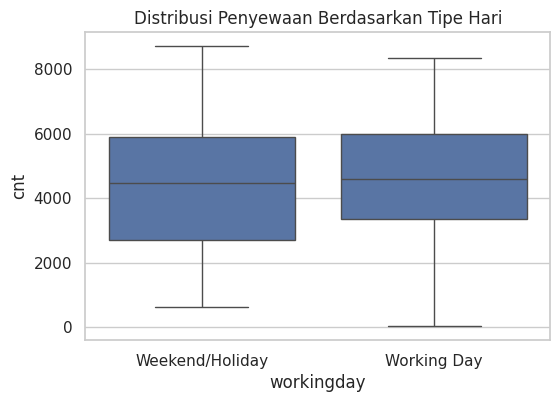

In [ ]:
day_type_mean = (
    day_df.groupby("workingday")["cnt"]
    .mean()
    .reset_index()
)

day_type_mean

# Visualisasi Rata-rata
plt.figure(figsize=(6,4))
sns.barplot(data=day_type_mean, x="workingday", y="cnt")
plt.title("Perbandingan Penyewaan: Working Day vs Weekend/Holiday")
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

# Distribusi
plt.figure(figsize=(6,4))
sns.boxplot(data=day_df, x="workingday", y="cnt")
plt.title("Distribusi Penyewaan Berdasarkan Tipe Hari")
plt.show()


**Insight:**
- Rata-rata penyewaan pada Working Day sedikit lebih tinggi dibanding Weekend/Holiday, menunjukkan bahwa penggunaan sepeda lebih intens terjadi pada hari kerja.
- Median distribusi pada kedua tipe hari relatif mirip, namun Working Day menunjukkan posisi median yang sedikit lebih tinggi, mengindikasikan konsistensi permintaan yang sedikit lebih besar.
- Rentang distribusi pada kedua kategori cukup lebar (dari mendekati 0 hingga di atas 8000), menunjukkan bahwa baik hari kerja maupun akhir pekan tetap mengalami fluktuasi permintaan yang signifikan.
- Tidak terdapat perbedaan ekstrem yang sangat mencolok antara kedua tipe hari, sehingga faktor hari kerja vs akhir pekan memiliki pengaruh, namun tidak sebesar pengaruh musim atau kondisi cuaca.

### Explore Pola Penyewaan Berdasarkan Jam

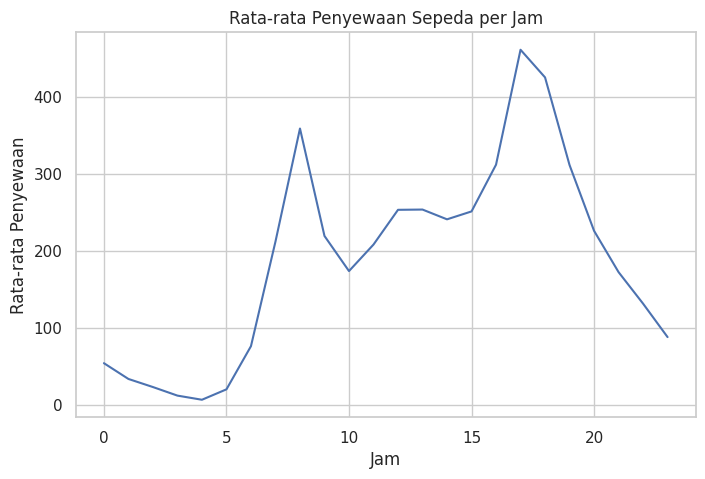

In [8]:
# Rata-rata penyewaan per jam
hourly_pattern = (
    hour_df.groupby("hr")["cnt"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(data=hourly_pattern, x="hr", y="cnt")
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda menunjukkan dua puncak utama dalam sehari, yaitu pada sekitar pukul 08.00 dan pukul 17.00–18.00.
- Puncak sore (sekitar pukul 17.00) merupakan titik tertinggi dalam sehari, menunjukkan bahwa permintaan sepeda paling besar terjadi pada jam pulang kerja.
- Penyewaan mulai meningkat signifikan sejak pukul 06.00, mencapai puncak pagi sekitar pukul 08.00, kemudian menurun menjelang siang.
- Pada periode tengah malam hingga dini hari (00.00–05.00), tingkat penyewaan sangat rendah, menunjukkan aktivitas penggunaan sepeda hampir tidak terjadi pada jam tersebut.
- Pola ini mengindikasikan bahwa penggunaan sepeda sangat terkait dengan aktivitas komuter (berangkat dan pulang kerja/sekolah).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rata-rata dan distribusi jumlah penyewaan sepeda berdasarkan musim selama periode 2011–2012, dan musim mana yang sebaiknya diprioritaskan untuk penambahan armada?

#### Visualisasi Rata-rata Penyewaan per Musim

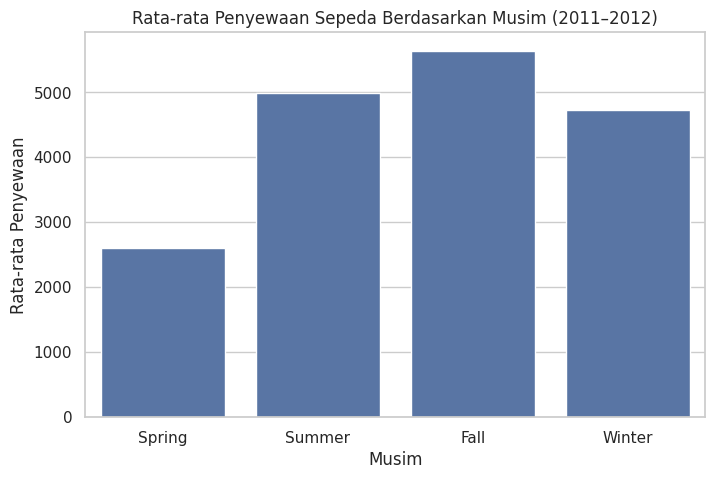

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=season_mean, x="season", y="cnt")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim (2011–2012)")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

#### Visualisasi Distribusi

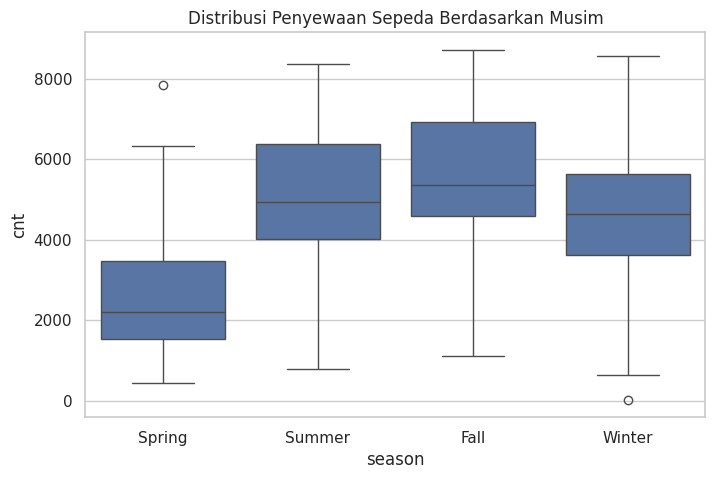

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x="season", y="cnt")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Explanatory Insight:**
- Musim Fall menunjukkan rata-rata penyewaan tertinggi (sekitar >5500 unit per hari) dan median distribusi yang juga paling tinggi dibanding musim lainnya. Hal ini menunjukkan bahwa peningkatan permintaan pada Fall bersifat konsisten dan bukan hanya dipengaruhi oleh beberapa hari ekstrem.
- Musim Summer memiliki rata-rata penyewaan yang juga tinggi (sekitar 5000 unit) dengan distribusi yang relatif stabil, menunjukkan periode permintaan kuat yang cukup merata.
- Musim Winter berada di bawah Summer dan Fall, namun tetap menunjukkan permintaan yang signifikan dengan variasi yang cukup lebar, termasuk beberapa hari dengan penyewaan sangat rendah.
- Musim Spring memiliki rata-rata dan median terendah (sekitar 2000–3000 unit), dengan distribusi yang secara konsisten berada pada rentang bawah dibanding musim lainnya.
- Perbedaan median dan rentang distribusi antar musim menunjukkan bahwa faktor musiman memiliki pengaruh signifikan terhadap pola penyewaan sepeda selama periode 2011–2012.

**Implikasi Bisnis:**
- Musim Fall merupakan periode prioritas untuk penambahan armada karena menunjukkan permintaan tertinggi dan konsisten.
- Musim Summer dapat diposisikan sebagai periode optimal kedua untuk memaksimalkan utilisasi armada.
- Pada Spring, perusahaan dapat mempertimbangkan strategi promosi atau efisiensi operasional karena tingkat permintaan relatif rendah.
- Variasi permintaan yang cukup besar pada Fall dan Winter menunjukkan perlunya perencanaan distribusi armada yang fleksibel agar dapat menyesuaikan fluktuasi harian.

### Pertanyaan 2: Seberapa besar penurunan rata-rata penyewaan sepeda pada kondisi cuaca buruk dibanding cuaca cerah, serta bagaimana implikasinya terhadap strategi operasional?

#### Visualisasi Rata-rata Penyewaan Berdasarkan Cuaca

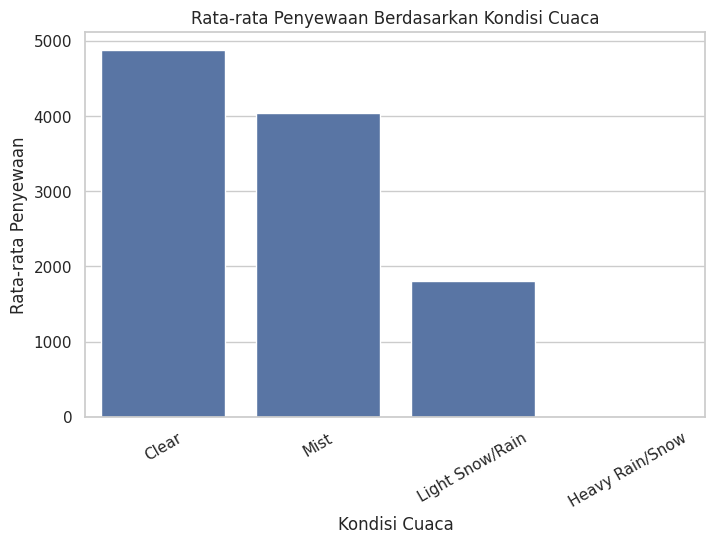

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=weather_mean, x="weathersit", y="cnt")
plt.xticks(rotation=30)
plt.title("Rata-rata Penyewaan Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

#### Menghitung Persentase Penurunan

In [12]:
clear_avg = weather_mean[weather_mean["weathersit"]=="Clear"]["cnt"].values[0]
bad_weather_avg = weather_mean[weather_mean["weathersit"].isin(["Light Snow/Rain","Heavy Rain/Snow"])]["cnt"].mean()

penurunan_persen = ((clear_avg - bad_weather_avg) / clear_avg) * 100
penurunan_persen

np.float64(63.02307198229698)

**Explanatory Insight:**
- Kondisi Clear menghasilkan rata-rata penyewaan tertinggi (mendekati 4900 unit per hari), menunjukkan bahwa permintaan sepeda optimal terjadi saat cuaca cerah.
- Pada kondisi Mist, rata-rata penyewaan menurun menjadi sekitar 4000 unit, namun masih menunjukkan tingkat permintaan yang relatif tinggi.
- Pada kondisi Light Snow/Rain, rata-rata penyewaan turun drastis menjadi sekitar 1700–1800 unit per hari.
- Berdasarkan perhitungan, terjadi penurunan rata-rata penyewaan sekitar 63% ketika membandingkan kondisi cuaca cerah dengan kondisi hujan/salju. Ini menunjukkan bahwa cuaca buruk memiliki dampak yang sangat signifikan terhadap permintaan.
- Kategori Heavy Rain/Snow hampir tidak menunjukkan aktivitas penyewaan, yang semakin menegaskan sensitivitas tinggi permintaan terhadap cuaca ekstrem.

**Implikasi Bisnis:**
- Karena terjadi penurunan permintaan hingga ±63% pada cuaca buruk, perusahaan sebaiknya menyesuaikan distribusi armada berdasarkan prakiraan cuaca untuk menghindari underutilization.
- Integrasi data cuaca dalam sistem perencanaan operasional dapat membantu meningkatkan efisiensi biaya dan utilisasi sepeda.
- Pada periode dengan prakiraan cuaca cerah, perusahaan dapat meningkatkan ketersediaan armada untuk memaksimalkan pendapatan.

### Pertanyaan 3: Bagaimana perbedaan pola penyewaan antara hari kerja dan akhir pekan, dan bagaimana perusahaan dapat mengoptimalkan distribusi berdasarkan tipe hari?

#### Visualisasi Perbandingan

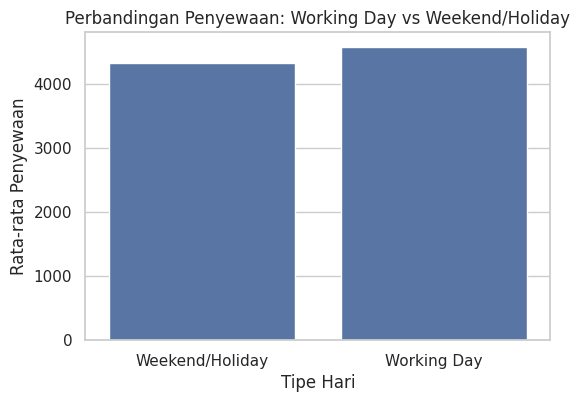

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(data=day_type_mean, x="workingday", y="cnt")
plt.title("Perbandingan Penyewaan: Working Day vs Weekend/Holiday")
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

#### Distribusi Pola

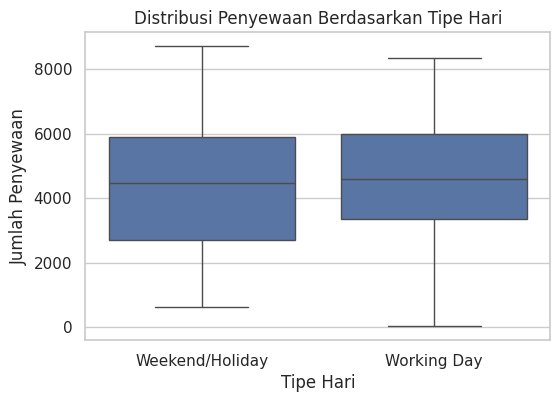

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=day_df, x="workingday", y="cnt")
plt.title("Distribusi Penyewaan Berdasarkan Tipe Hari")
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Explanatory Insight:**
- Rata-rata penyewaan pada Working Day sedikit lebih tinggi dibanding Weekend/Holiday, menunjukkan adanya peningkatan penggunaan sepeda pada hari kerja.
- Median distribusi pada Working Day juga berada sedikit di atas Weekend/Holiday, mengindikasikan permintaan yang secara konsisten lebih tinggi pada hari kerja.
- Rentang distribusi pada kedua tipe hari relatif mirip dan cukup lebar, menunjukkan bahwa baik hari kerja maupun akhir pekan tetap mengalami fluktuasi permintaan yang signifikan.
- Perbedaan antara Working Day dan Weekend tidak terlalu besar dibandingkan perbedaan akibat musim atau kondisi cuaca, sehingga tipe hari bukan faktor dominan dalam variasi permintaan.

**Implikasi Bisnis:**
- Karena perbedaan permintaan antara Working Day dan Weekend relatif kecil, strategi operasional sebaiknya lebih difokuskan pada faktor musiman dan cuaca yang menunjukkan dampak lebih signifikan.
- Namun, sedikit peningkatan pada Working Day mengindikasikan potensi penggunaan sepeda untuk aktivitas rutin atau komuter, sehingga distribusi armada dapat sedikit lebih diprioritaskan pada hari kerja.

## Analisis Lanjutan (Opsional)

### Korelasi Numerik

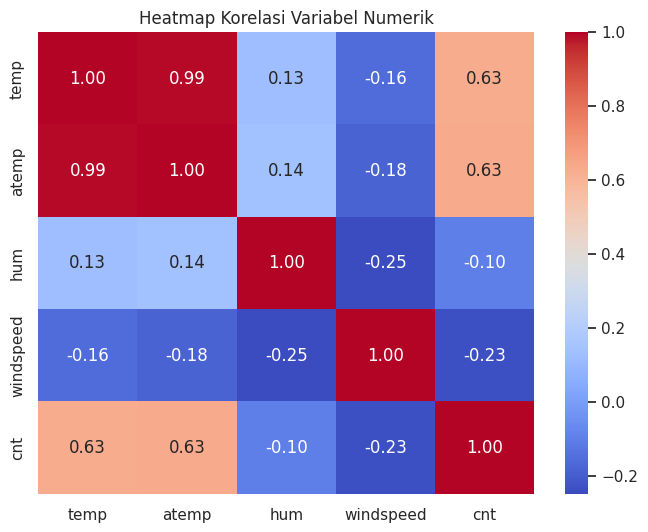

In [15]:
numeric_cols = ["temp", "atemp", "hum", "windspeed", "cnt"]
corr = day_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

**Insight:**
- Variabel temp dan atemp memiliki korelasi positif sedang terhadap jumlah penyewaan (`r ≈ 0.63`). Hal ini menunjukkan bahwa peningkatan suhu berkaitan dengan peningkatan permintaan sepeda.
- Korelasi antara temp dan atemp sangat tinggi (`r ≈ 0.99`), yang mengindikasikan bahwa kedua variabel hampir merepresentasikan informasi yang sama. Dalam analisis lanjutan, salah satu variabel sebenarnya sudah cukup mewakili efek suhu.
- Variabel humidity (hum) memiliki korelasi negatif lemah terhadap jumlah penyewaan (`r ≈ -0.10`), menunjukkan bahwa kelembapan tinggi sedikit menurunkan permintaan, namun pengaruhnya relatif kecil.
- Windspeed menunjukkan korelasi negatif lemah hingga sedang terhadap penyewaan (`r ≈ -0.23`), yang berarti semakin tinggi kecepatan angin, cenderung terjadi penurunan permintaan.
- Secara keseluruhan, suhu merupakan faktor numerik paling dominan yang berkaitan dengan variasi jumlah penyewaan dibandingkan variabel cuaca lainnya.

### Binning (Manual Clustering)

In [16]:
bins = [0, 2000, 4000, 7000, day_df["cnt"].max()]
labels = ["Low", "Medium", "High", "Very High"]

day_df["rent_category"] = pd.cut(
    day_df["cnt"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

day_df["rent_category"].value_counts()

rent_category
High         358
Medium       181
Low           98
Very High     94
Name: count, dtype: int64

**Insight:**
- Mayoritas hari berada pada kategori High (358 hari), menunjukkan bahwa permintaan penyewaan sepeda pada periode 2011–2012 cenderung berada pada tingkat tinggi secara konsisten.
- Kategori Medium (181 hari) muncul cukup sering, namun jumlahnya jauh lebih sedikit dibanding kategori High.
- Kategori Low (98 hari) dan Very High (94 hari) relatif lebih jarang, menunjukkan bahwa permintaan ekstrem (sangat rendah atau sangat tinggi) tidak terjadi setiap hari.
- Distribusi ini mengindikasikan bahwa tingkat penyewaan tinggi bukan kejadian sporadis, melainkan pola yang cukup stabil selama dua tahun pengamatan.

## Conclusion

Berdasarkan analisis data penyewaan sepeda periode 2011–2012, diperoleh beberapa temuan utama yang memiliki implikasi strategis bagi perusahaan.
1. Faktor musiman memiliki pengaruh signifikan terhadap permintaan. Musim Fall menunjukkan rata-rata dan median penyewaan tertinggi, diikuti oleh Summer. Sebaliknya, Spring memiliki tingkat penyewaan terendah. Hal ini menunjukkan bahwa permintaan tidak merata sepanjang tahun dan meningkat secara konsisten pada periode tertentu.

    Implikasi:
    - Perusahaan sebaiknya memprioritaskan penambahan armada dan kesiapan operasional menjelang dan selama musim Fall.
    - Perencanaan maintenance preventif dapat dilakukan pada periode dengan permintaan lebih rendah seperti Spring.
2. Kondisi cuaca memiliki dampak yang sangat kuat terhadap jumlah penyewaan. Rata-rata penyewaan pada cuaca hujan/salju turun sekitar 63% dibandingkan kondisi cerah. Korelasi numerik juga menunjukkan bahwa suhu memiliki hubungan positif sedang (r ≈ 0.63) terhadap jumlah penyewaan, sementara kelembapan dan kecepatan angin berkorelasi negatif.

    Implikasi:
    - Integrasi prakiraan cuaca dalam sistem perencanaan distribusi dapat meningkatkan efisiensi operasional.
    - Distribusi armada dapat ditingkatkan saat prakiraan cuaca cerah dan dikurangi saat cuaca buruk untuk menghindari underutilization.
3. Perbedaan antara Working Day dan Weekend relatif kecil dibanding pengaruh musim dan cuaca. Rata-rata penyewaan pada hari kerja sedikit lebih tinggi, namun distribusi keduanya relatif mirip.
    
    Implikasi:
    - Strategi operasional sebaiknya lebih difokuskan pada faktor musiman dan cuaca dibanding hanya membedakan tipe hari.
    - Hari kerja tetap menunjukkan potensi penggunaan komuter yang stabil.
4. Analisis binning menunjukkan mayoritas hari berada pada kategori High, yang berarti permintaan tinggi bukan kejadian sporadis melainkan pola yang cukup konsisten selama periode pengamatan.

    Implikasi:
    - Kapasitas armada sebaiknya dirancang untuk mengakomodasi demand tinggi secara rutin, bukan hanya saat puncak musiman.

# **Simpan Data**

In [17]:
day_df.to_csv("dashboard/main_data.csv", index=False)